In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")

# Step 1: Filter movies and TV shows separately
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# Step 2: Drop rows where duration is missing
movies = movies.dropna(subset=['duration'])
tv_shows = tv_shows.dropna(subset=['duration'])

# Step 3: Clean 'duration' column for both
# Remove ' min' and convert to int (for movies)
movies['duration_int'] = movies['duration'].str.replace(' min', '').astype(int)

# Remove ' Season(s)' and convert to int (for TV shows)
tv_shows['duration_int'] = (
    tv_shows['duration']
    .str.replace(' Season', '')
    .str.replace('s', '')
    .astype(int)
)


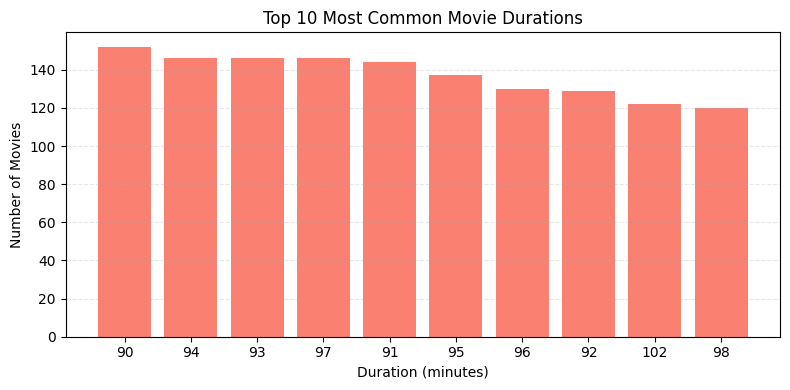

In [3]:
import matplotlib.pyplot as plt

# Top 10 most common movie durations
top_movie_durations = movies['duration_int'].value_counts().head(10)

plt.figure(figsize=(8,4))
plt.bar(top_movie_durations.index.astype(str), top_movie_durations.values, color='salmon')
plt.title('Top 10 Most Common Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

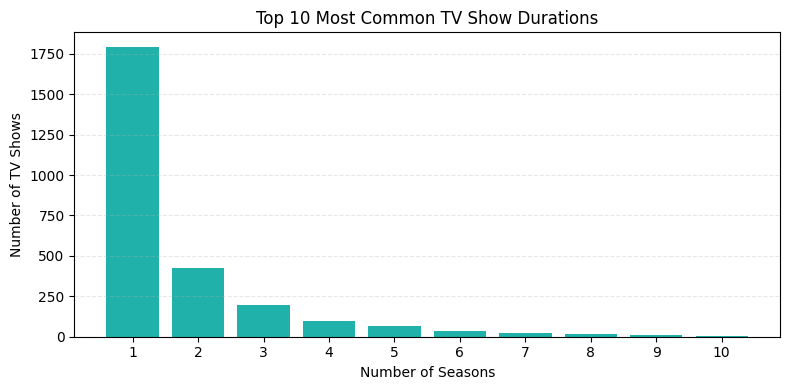

In [4]:
# Top 10 most common TV show durations (number of seasons)
top_tv_durations = tv_shows['duration_int'].value_counts().head(10)

plt.figure(figsize=(8,4))
plt.bar(top_tv_durations.index.astype(str), top_tv_durations.values, color='lightseagreen')
plt.title('Top 10 Most Common TV Show Durations')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


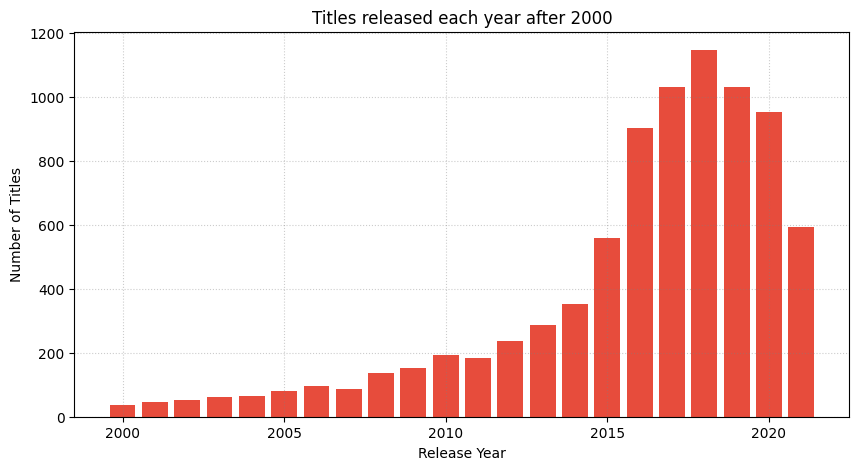

In [16]:
# Filter data from the year 2000 onwards
recent = df[df['release_year'] >= 2000]

# Count how many titles released each year
yearly_counts = recent['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(yearly_counts.index, yearly_counts.values, color = '#E74C3C')  # Bright Coral Red
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(color='gray', linestyle=':', alpha=0.4)
plt.title('Titles released each year after 2000')
plt.show()